![Imgur](https://i.imgur.com/KQyknb7.png)

# Fourier Transform

If you are only slightly interested in sound, I can only recommend getting to be friends with the Fourier transform. The <a href="https://en.wikipedia.org/wiki/Fourier_analysis">Fourier transform</a> is used in a variety of cases, such as better understanding the planet <a href="https://www.researchgate.net/publication/24335883_Cassini_CIRS_Observations_of_Saturn's_Rings">Saturn's rings</a> and our own planet's <a href="https://www.sciencedirect.com/science/article/pii/S2210983818300117">ocean waves</a>. Tell me that is not cool. 

Thinking of these use cases, the Fourier transform feels more like a super power than a math equation. With it we can zoom to other planets and stars to see what they're made out of, which direction they're going etc. Well, I am delighted to say that this same super power giving tool is very necessary in the field of acoustics.  

If you are not yet familiar, what this lovely equation does, is it takes the digitized form of a wave, which shows the amplitude or energy in the wave in time, and transforms it show which frequency or frequencies exist in the wave (and also the energy level of those frequencies). For a more in-depth introduction, I discovered this <a href="https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/">jewel</a> of an explanation. If you're interested in a calming YouTube video with stellar twirly visuals, check out <a href="https://www.youtube.com/watch?v=spUNpyF58BY&t=424s">this one</a> from 3 Blue 1 Brown.

On to our own visuals... of sound!
## Important Note: 

### **If you would like to use your own sound files in this JupyterLab, you may need to prepare them for this online environment** (here is my <a href="https://github.com/a-n-rose/python-sound-prep#prepare-audio-for-jupyter-lab">repo</a> that can help). 

### Only .wav files with bitdepth of 16 or 32 are acceptable.

In [10]:
# import libraries for playing and loading sound
!pip install scipy
!pip install numpy
!pip install matplotlib
import IPython.display as ipd
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

## Load the wavfile: digital sound wave

I am using scipy's <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html">wavfile module</a> to `read` the wavfile I want to work with. As of now, it does not support wavfiles with 24-bit data. (Something to keep in mind if you want to use your own wavfiles in this notebook.) 

The module's function `read` returns two items, which I named `sr` and `samps`.

`sr` refers to the sampling rate of the audio. This just indicates the number of times per second the amplitude of the sound wave is measured. High definition sound has an 'sr' of around 48000 and telephone lines are usually capped to a sampling rate of only 8000. 

A higher sampling rate means more data to deal with which usually requires more computational resources and likely more time to process. In real time applications, for example telephoning, it is most important that sound be processed quickly. We all know how frustrating conversations with a time delay are. Non-real time applications, such as listening to music or watching movies, it is more important that the sound be of great quality. Because the processing doesn't have to be real time, a higher sampling rate can be used, resulting in a crisper and more enjoyable sound.

The other variable name, `samps`, refers to the measurements of amplitude of the sound signal. We will graph them below so you can see what they look like.

In [12]:
wav = '../audiodata/python.wav'
sr, samps = read(wav)
ipd.Audio(samps, rate=sr)

In [13]:
# creating variables for clarification
samples_per_second = sr
total_samples = len(samps)
time_seconds = total_samples / samples_per_second
print("Sampling rate: ", samples_per_second)
print("Total number of samples: ", total_samples)
print("Total time in seconds: ", time_seconds)

Sampling rate:  44100
Total number of samples:  38093
Total time in seconds:  0.8637868480725623


In [14]:
time_vector = np.linspace(0, time_seconds, total_samples)

Text(0, 0.5, 'amplitude')

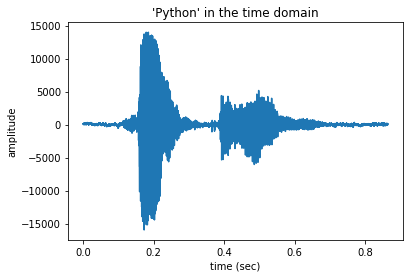

In [15]:
plt.plot(time_vector, samps)
plt.title("'Python' in the time domain")
plt.xlabel('time (sec)')
plt.ylabel('amplitude')

### Normalizing the values

If you look at the amplitude values, they are al over the place. Let's bring them between -1 and 1.

In [16]:
samps_normed = np.interp(samps,(samps.min(), samps.max()),(-1, 1))

Text(0, 0.5, 'amplitude')

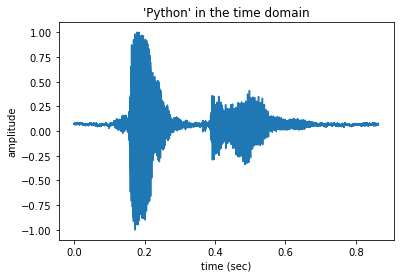

In [17]:
plt.plot(time_vector, samps_normed)
plt.title("'Python' in the time domain")
plt.xlabel('time (sec)')
plt.ylabel('amplitude')

### Breaking down the time domain

I studied clinical linguistics, so I feel I have to show you some cool linguistics stuff before moving on. 

In the waveform above, you can see some changes happening in the signal. 

Think about the individual sounds that make up the word 'python'. 

One thing you can see very well in the time domain is the difference between voiced and voiceless sounds. The letters 'p' and, in this case, 'th' are voiceless, as no vocal cords are activated when pronouncing them. The letters 'y', 'o' and 'n' are voiced, because one needs to vibrate the vocal cords in order to produce them. 

Looking at the signal above, you can probably piece out which sections belong to which letter.

For fun let's zoom into the letter 'p' and its transition to 'y'.

Text(0, 0.5, 'amplitude')

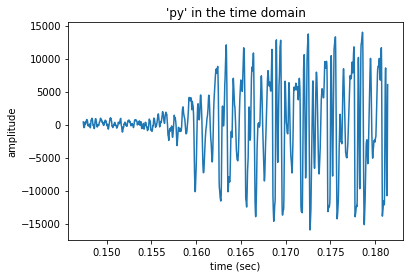

In [18]:
plt.plot(time_vector[6500:8000], samps[6500:8000])
plt.title("'py' in the time domain")
plt.xlabel('time (sec)')
plt.ylabel('amplitude')

As you can see, there is almost no energy in the signal at the beginning, and around 0.158 seconds, an explosion of energy comes. 

There is a lot to understand about the signal looking at it in the time domain like this. As a linguist, it is helpful when annotating speech: one can see quite clearly when specific sounds are being made. 

However, it is difficult to know more specifics about the sound or the speaker.  For example, it would be hard to know if the speaker was actually saying 'Python' or rather 'Tafem'. Each of those letters have similar characteristics:

* 'p' and 't' are plosives and voiceless

* 'y' and 'a' are vowels and voiced

* 'th' and 'f' are fricatives and voiceless

* 'o' and 'e' are vowels and voiced

* 'n' and 'm' are nasals and voiced

This is where the **Fourier transform**, or the FFT, comes in to help us. 

### FFT

Several libraries allow you to apply the fft, such as Librosa's <a href="https://librosa.github.io/librosa/generated/librosa.core.stft.html">STFT</a> function, which stands for short-time fourier transform. 

Note: all STFT means is that the FFT is conducted on consecutive segments of 'short-time' periods. For example, the FFT could be conducted on a very long signal - not consecutive segments, or windows - **if** the signal is not constantly changing. But if you have a signal, for example, speech, or even background noise, where the signal changes according to sounds produced ('l' vs 'r') or what is happening in the room, you need to apply the FFT in small windows, aka, you need to apply the STFT to a changing signal. By applying the STFT, or the FFT in successive, overlapping windows of the sound, you can identify the frequencies as they change. If you were to apply the fft to the entire signal, in one big window, all the complexities of that signal would be lost.

### Visualization

For visualization purposes, I will be using <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html">scipy.signal.spectrogram</a> along with <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html">matplotlib.pyplot</a> to calculate the FFT on varying sound types.

In [19]:
import matplotlib.pyplot as plt
from scipy import signal

### FFT: Visualizing a simple signal

In [20]:
#create a simple sine wave
def create_signal(freq=500, amplitude=0.4, sampling_rate=8000, dur_sec=0.25):
    #The variable `time` holds the expected number of measurements taken: 
    #duration in seconds multiplied by the sampling rate. 
    time = np.linspace(0, dur_sec, np.floor(dur_sec*sampling_rate))
    full_circle = 2 * np.pi
    sinewave_samples = amplitude * np.sin((freq*full_circle)*time)
    return sinewave_samples, sampling_rate, time

In [21]:
sin_samps, sin_sr, sin_time = create_signal() #I'm keeping the defaults

Which sounds like this:

In [22]:
ipd.Audio(sin_samps, rate=sin_sr)

### <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html">scipy.signal.spectrogram</a>

I suggest clicking on the link above, to the documentation, and keep it open on a separate tab. This will help you understand the parameters and function in general, at least better than what I've pasted below, which are the parameters and their defaults. 

I also suggest to play around with the settings and see how they influence the picture. If you lose track of the original settings, just come back to my <a href="https://notebooks.ai/a-n-rose/visualizing-the-fourier-transfrom-in-python/lab">original notebook</a> if you have forked this.

scipy.signal.spectrogram(x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd')

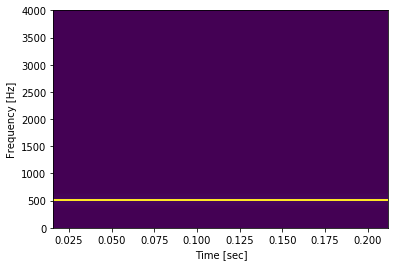

In [23]:
f, t, Sxx = signal.spectrogram(x = sin_samps, fs=sin_sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### Break this down

Do the numbers of this graph match the sound wave we created?

The time goes to 0.25 seconds. Check. 

The yellow frequency bar looks like it is set to 500 Hz. Check. 

There is only one frequency in the signal, and there is only one yellow bar. Check.

If you are wondering why the Frequencies go up to 4000, the short answer is: it is half the sampling rate 8000, which we set when we created the signal. To dive into why that is, I explore that in another <a href="https://notebooks.ai/a-n-rose/working-with-signals-c2032035">notebook</a>. 

Nice.

What happens with a more complex signal? 

### Make something simple slightly more complicated

### Add some noise:

In [24]:
def create_noise(num_samples, amplitude=0.025, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)
    noise = amplitude * np.random.randn(num_samples)
    return noise

### Increase number of frequencies

In [25]:
# duration and sampling rate need to be the same in order to combine them later
sr_comp = 8000
duration = 1

samps1, sr1, time1 = create_signal(freq=500, amplitude=0.7, sampling_rate=sr_comp, dur_sec=duration)
samps2, sr2, time2 = create_signal(freq=2000, amplitude=0.5, sampling_rate=sr_comp, dur_sec=duration)
samps3, sr3, time3 = create_signal(freq=1111, amplitude = 0.3, sampling_rate=sr_comp, dur_sec=duration)

In [26]:
sin_mult = samps1+samps2+samps3

In [27]:
noise2add = create_noise(num_samples = len(sin_mult))
sin_noisy = sin_mult + noise2add

### Let's listen to it. 

I feel like this won't be pleasant.

In [28]:
ipd.Audio(sin_noisy, rate=sr_comp)

Can you hear the different frequencies as well as the noise?

### FFT: Visualizing a slightly more complex signal

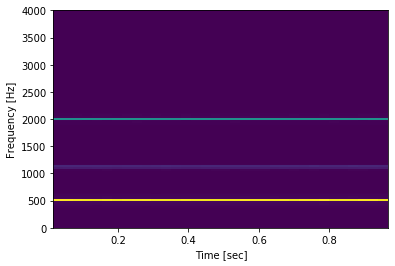

In [29]:
f, t, Sxx = signal.spectrogram(x = sin_noisy, fs=sr_comp)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Can you see all three frequencies? I can, but I'll be honest, I can't see the noise.

The loudest frequency is very easy to see, the yellow one at 500 Hz. As the amplitudes of the frequencies decrease, the harder it is to see them. We can still see the green one at 2000 Hz, but I can hardly see the quietest frequency at 1111 Hz. 

When you compare this with what you see in the graph below, I can't say this is too bad! Below you see the same signal, but in the time domain, which we discussed earlier.

Looking back at the FFT visual above, notice that the frequencies stay straight and do not change, across the entire graph. No windowing would be necessary for this. However, when a signal changes, for example in speech, we can't lump the entire signal into one window.

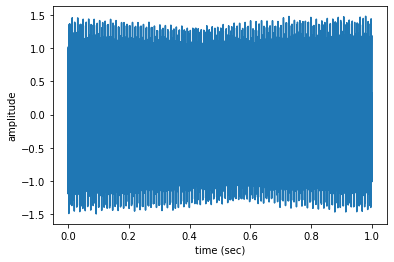

In [30]:
plt.plot(time1,sin_noisy)
plt.xlabel('time (sec)') 
plt.ylabel('amplitude')
plt.show()

### FFT: Visualizing speech

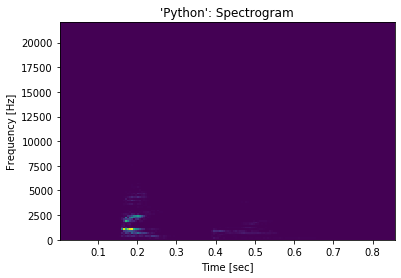

In [31]:
f, t, Sxx = signal.spectrogram(x = samps_normed, fs=sr)
plt.pcolormesh(t, f, Sxx)
plt.title("'Python': Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Hmmmmmmph. Can't see much. I'll work on improving this visual, perhaps with <a href="https://dsp.stackexchange.com/questions/1593/improving-spectrogram-resolution-in-python">their help</a>. 

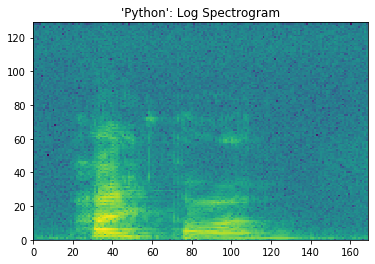

In [32]:
f, t, Sxx = signal.spectrogram(x = samps_normed, fs=sr)
mag = np.abs(Sxx)
mag_log = np.log(mag)
plt.pcolormesh(mag_log)
plt.title("'Python': Log Spectrogram")
plt.show()

Looks better now that I've taken the natural log of the spectrogram.. but I'm still working on the x and y label scales.

Moving on. Luckily I have a flashier graph already on this page: 

**Take a look at this picture that is also at the top of this 'tutorial':**

![Imgur](https://i.imgur.com/nVGjKeU.png)

That is basically the same thing I'm trying to graph here, but much more vain: it's me saying my name! The brighter spots 'further in the distance'? Those are the 's' letters in Aislyn Rose! Notice the columns going from left to right? Those are the windows where the FFT was applied, each window lasting appx. 20 ms! Imagine all those colors mixed together, averaged out. That would be what it would look like if the FFT were applied to the signal all at once. Tragic idea.

Aaaanyways, know that this graph above (the mostly purple one where you can hardly see anything) is a spectrogram, or visual representation of the FFT over time, of me saying the word 'Python'. I think you can guess where the sound 'py' is... 

Just taking a look at the loudest part of the signal, 'py', there are curvatures there that reveal the complexities within the signal that aren't seen when we look at the signal in the time domain. These curvatures help reveal what type of sounds are actually being made, as in where in the mouth they are made, not only if the sound is voiced or not.


## Closing Remarks

It is with images like this that we can train neural networks on speech recognition or speaker identification. We all have different bodies and therefore instruments with which we create sound. This means that the frequencies we each generate are different, and neural networks can learn these differences. Perhaps that is a creepy note to end on, but let's face it, sound analysis can be very very creepy. But also beautiful. We are all musical instruments.

I hope to have a notebook prepared soon, where you can explore how this image changes depending on the features extracted.

### Uploading your own sounds

Feel free to load your own sounds or download some from freesound.org (<a href="https://freesound.org/search/?g=1&q=&f=%20license:%22Creative%20Commons%200%22%20type:%22wav%22%20bitdepth:%2216%22">search results for sounds that can be loaded in a Jupyter notebook</a>). I use scipy.io.wavfile, allowing me to load sound into a Jupyter environment. This does limit the format of the soundfiles... keep that in mind. You can see what file types are acceptable <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html">here</a>.